In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()

import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\48504\AppData\Local\Temp\ipykernel_16348\3385592174.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
URL = "oto_dom_wroclaw_30_10_2023_cleaned_up"

In [3]:
#Wczytanie danych
df = pd.read_csv(URL, sep=",", encoding="utf-8")

In [4]:
df

titles    prices  \
0           3 pokoje z zielonym tarasem i balkonem + MP  759000.0   
1                      Maślicka 166 C | mieszkanie K2_2  616161.0   
2     Bezpieczna/dwustronne/rozkład/co miejskie/piwnica  576000.0   
3     Piłsudskiego/ super/ m. miejskie/ balkon /piwnica  470000.0   
4                            Mieszkanie, 61 m², Wrocław  633000.0   
...                                                 ...       ...   
6661   1,4 Km od Rynku Idealne dla Rodziny Stare Miasto  456000.0   
6662                                    Ovo Apartamenty  699000.0   
6663   2-pokoje, komfortowa lokalizacja - Sienkiewicza.  834000.0   
6664                                   ładne 2 pokojowe  489000.0   
6665                         Lokal mieszkalny i działka  471850.4   

                                               location   area  \
0             Maślice, Fabryczna, Wrocław, dolnośląskie  61.83   
1     ul. Maślicka 166, Maślice, Fabryczna, Wrocław,...  67.71   
2     Bezpieczna okolice, Różanka, Psie Pole, Wrocła...  57.70   
3     ul. marsz. Józefa Piłsudskiego, Przedmieście Ś...  40.00   
4               Tarnogaj, Krzyki, Wrocław, dolnośląskie  61.00   
...                                                 ...    ...   
6661       Nadodrze, Śródmieście, Wrocław, dolnośląskie  46.50   
6662  ul. Podwale, Stare Miasto, Stare Miasto, Wrocł...  25.00   
6663  ul. Henryka Sienkiewicza, Ołbin, Śródmieście, ...  65.97   
6664  ul. Jedności Narodowej, Ołbin, Śródmieście, Wr...  54.00   
6665  Przedmieście Świdnickie, Stare Miasto, Wrocław...  55.45   

      price per square meter  numbers_of_rooms  \
0                      12276                 3   
1                       9100                 3   
2                       9983                 3   
3                      11750                 1   
4                      10377                 3   
...                      ...               ...   
6661                    9806                 3   
6662                   27960                 1   
6663                   12642                 2   
6664                    9056                 2   
6665                    8509                 3   

                                                   urls property_ownership  \
0     https://www.otodom.pl/pl/oferta/3-pokoje-z-zie...     pełna własność   
1     https://www.otodom.pl/pl/oferta/maslicka-166-c...     pełna własność   
2     https://www.otodom.pl/pl/oferta/bezpieczna-dwu...     pełna własność   
3     https://www.otodom.pl/pl/oferta/pilsudskiego-s...            Zapytaj   
4     https://www.otodom.pl/pl/oferta/mieszkanie-61-...     pełna własność   
...                                                 ...                ...   
6661  https://www.otodom.pl/pl/oferta/1-4-km-od-rynk...     pełna własność   
6662  https://www.otodom.pl/pl/oferta/ovo-apartament...     pełna własność   
6663  https://www.otodom.pl/pl/oferta/2-pokoje-komfo...     pełna własność   
6664  https://www.otodom.pl/pl/oferta/ladne-2-pokojo...     pełna własność   
6665  https://www.otodom.pl/pl/oferta/lokal-mieszkal...            Zapytaj   

     condition_of_property   floor  ... utilities_dummy_telefon  \
0          do zamieszkania  parter  ...                       0   
1           do wykończenia  parter  ...                       0   
2          do zamieszkania       4  ...                       1   
3          do zamieszkania       3  ...                       1   
4           do wykończenia       2  ...                       0   
...                    ...     ...  ...                     ...   
6661               Zapytaj       1  ...                       0   
6662       do zamieszkania       5  ...                       0   
6663       do zamieszkania       1  ...                       1   
6664       do zamieszkania       4  ...                       0   
6665               Zapytaj  parter  ...                       0   

      utilities_dummy_telewizja_kablowa utilities_dummy_woda  \
0                   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   titles                                      6666 non-null   object 
 1   prices                                      6666 non-null   float64
 2   location                                    6666 non-null   object 
 3   area                                        6666 non-null   float64
 4   price per square meter                      6666 non-null   int64  
 5   numbers_of_rooms                            6666 non-null   int64  
 6   urls                                        6666 non-null   object 
 7   property_ownership                          6666 non-null   object 
 8   condition_of_property                       6666 non-null   object 
 9   floor                                       6666 non-null   object 
 10  balcon_garde

In [6]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int8', 'int32', 'int64', 'float64']]

numerical_cols

['prices',
 'area',
 'price per square meter',
 'numbers_of_rooms',
 'amount_of_rent',
 'number_of_floors',
 'balcon_garden_terrace_dummy_Zapytaj',
 'balcon_garden_terrace_dummy_balkon',
 'balcon_garden_terrace_dummy_ogrodek',
 'balcon_garden_terrace_dummy_taras',
 'utilities_dummy_brak_informacji',
 'utilities_dummy_gaz',
 'utilities_dummy_internet',
 'utilities_dummy_kanalizacja',
 'utilities_dummy_prad',
 'utilities_dummy_telefon',
 'utilities_dummy_telewizja_kablowa',
 'utilities_dummy_woda',
 'security_dummy_brak_informacji',
 'security_dummy_domofon_/_wideofon',
 'security_dummy_drzwi_/_okna_antywlamaniowe',
 'security_dummy_monitoring_/_ochrona',
 'security_dummy_rolety_antywlamaniowe',
 'security_dummy_system_alarmowy',
 'security_dummy_teren_zamkniety']

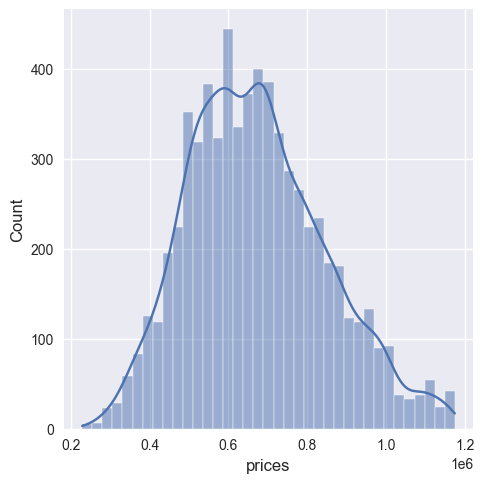

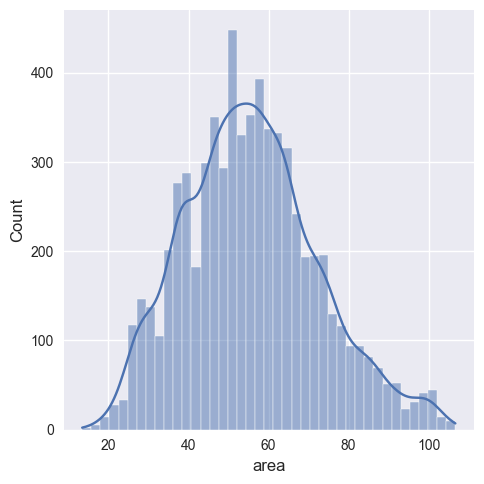

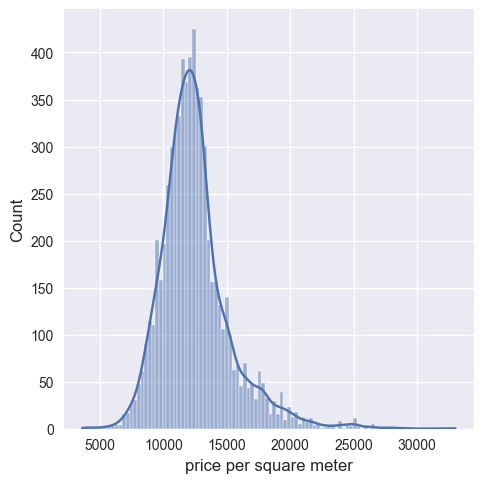

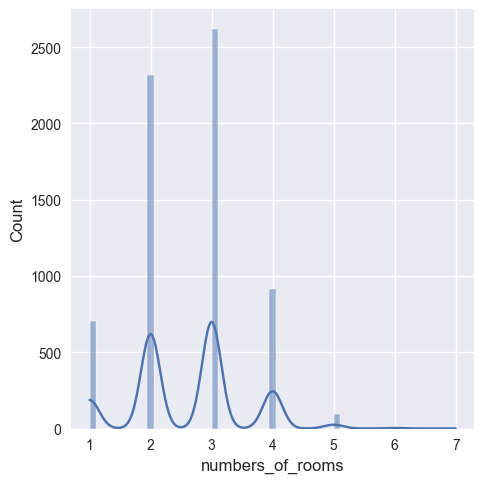

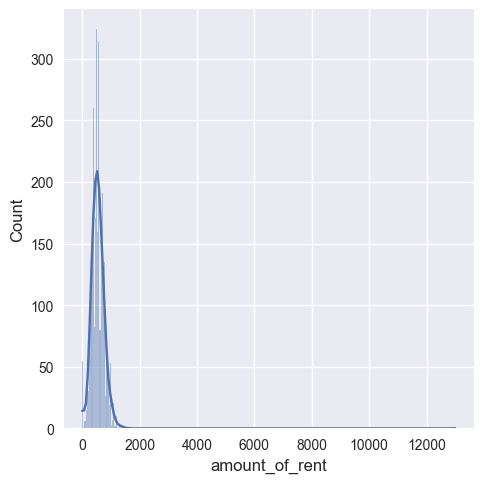

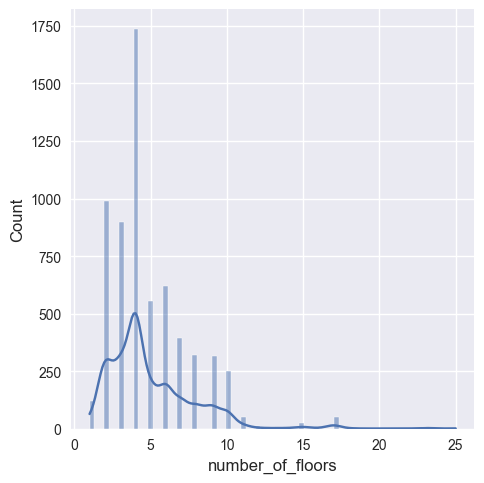

In [7]:
for cname in numerical_cols[0:6]:
    sns.displot(data=df, x=cname,  kde=True)

In [8]:
df[(df['amount_of_rent'] > 4000 )]["amount_of_rent"]

2553    13000.0
Name: amount_of_rent, dtype: float64

In [9]:
df.loc[(df['amount_of_rent'] > 4000 ), 'amount_of_rent'] = 1300

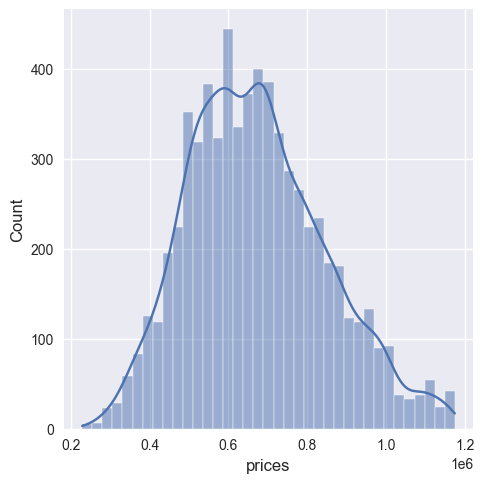

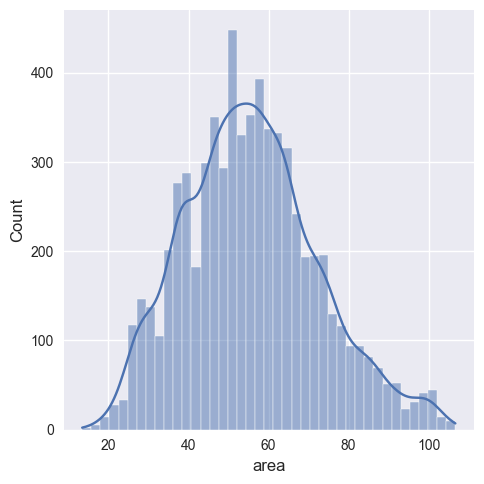

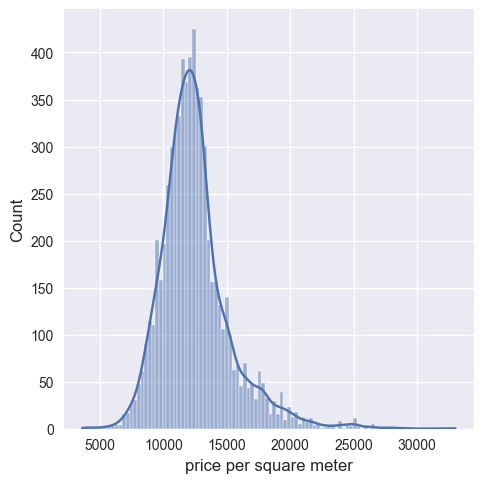

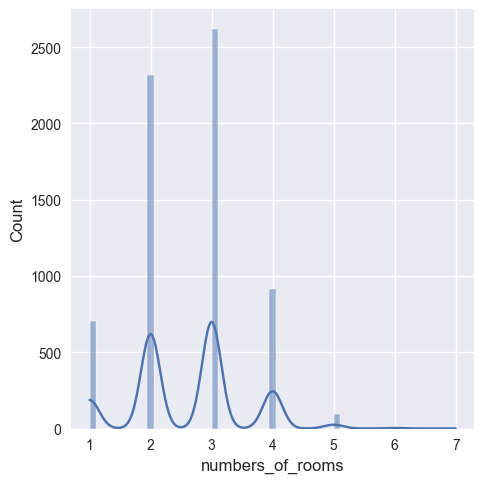

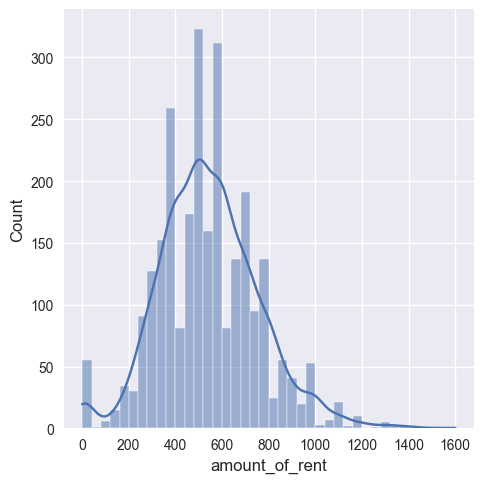

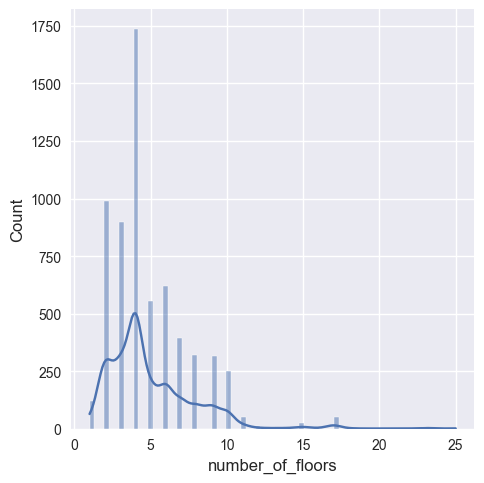

In [10]:
for cname in numerical_cols[0:6]:
    sns.displot(data=df, x=cname,  kde=True)

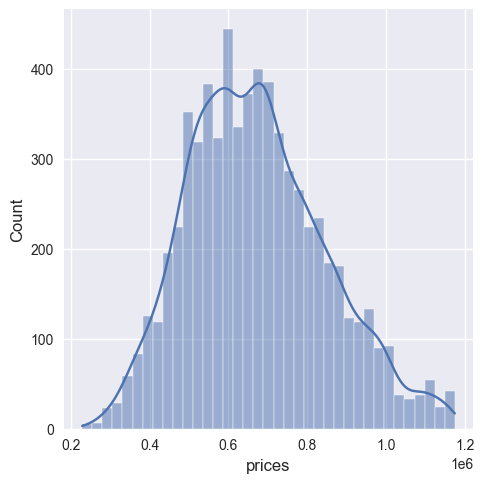

In [11]:
sns.displot(data=df, x="prices",  kde=True)

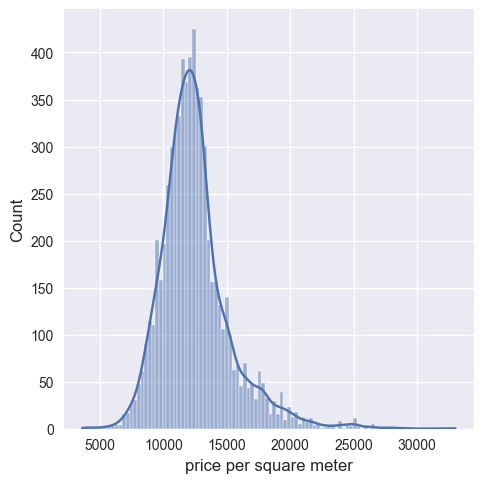

In [12]:
sns.displot(data=df, x="price per square meter",  kde=True)

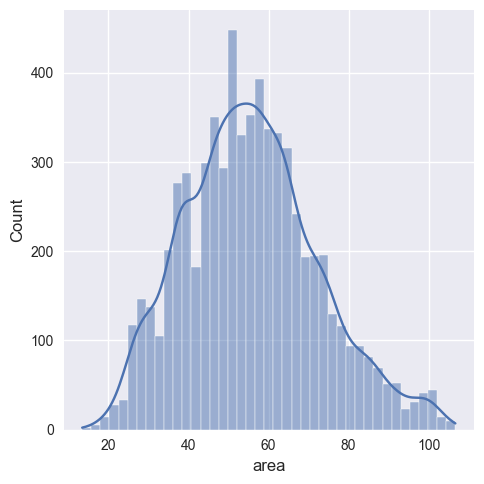

In [13]:
sns.displot(data=df, x="area",  kde=True)

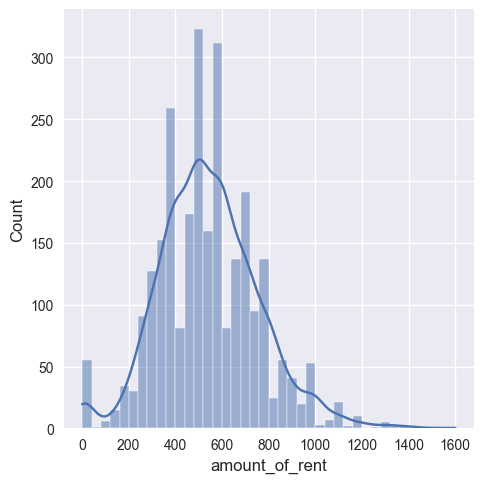

In [14]:
sns.displot(data=df, x="amount_of_rent",  kde=True)

<Axes: >

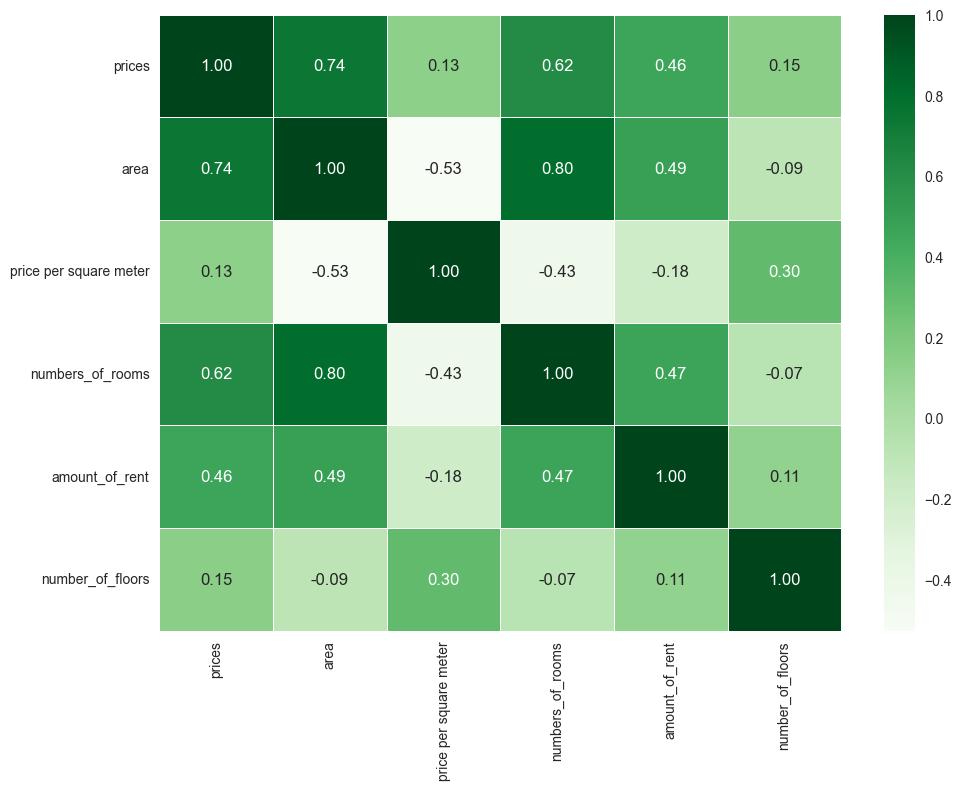

In [15]:
corr = df[numerical_cols[:6]].corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

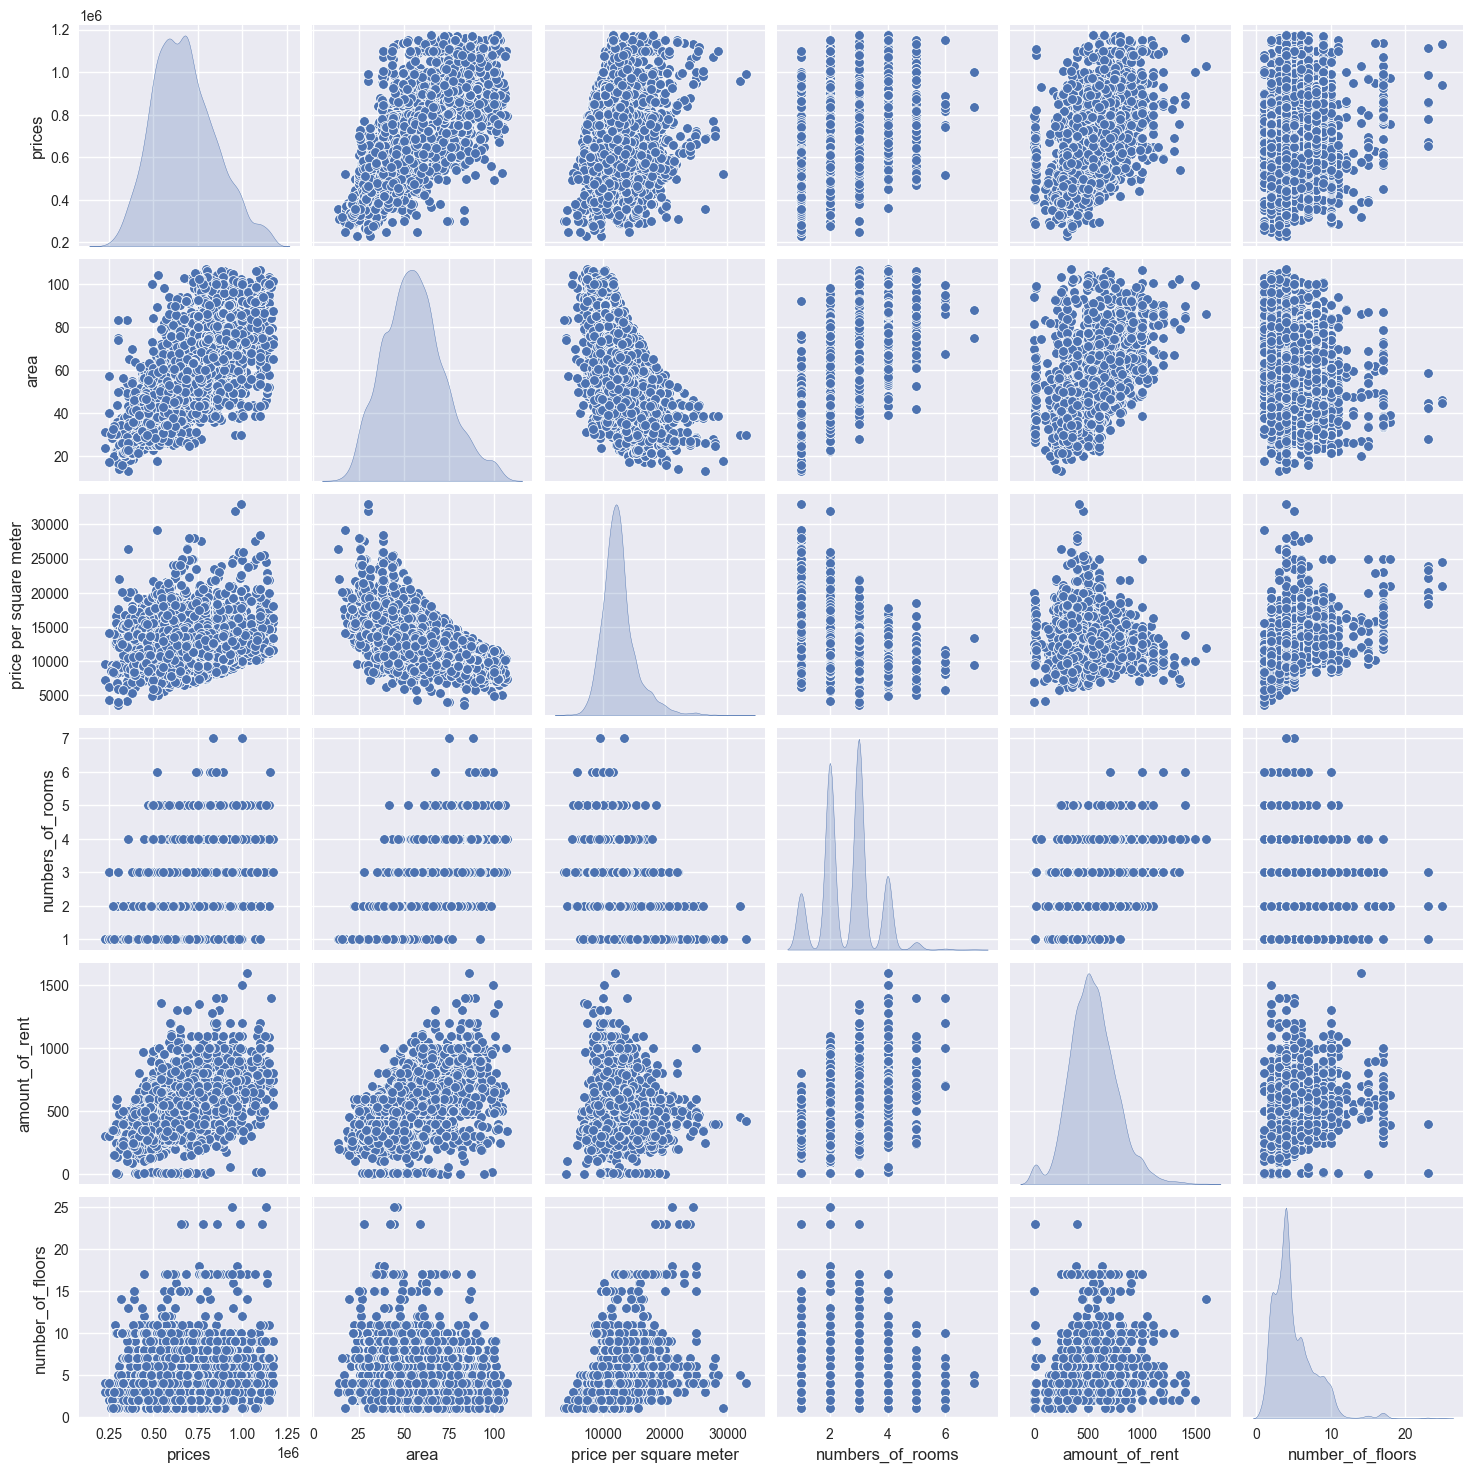

In [16]:
sns.pairplot(data=df[numerical_cols[:6]+["lift"]], diag_kind="kde", height=2.5)
#sns.pairplot(data=df[numerical_cols[:6]+["primary_secondary"]], hue="primary_secondary", diag_kind="kde", height=2.5)


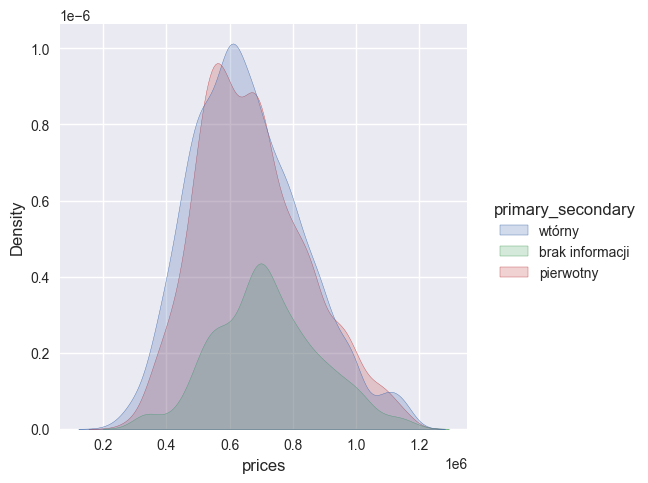

In [17]:
sns.displot(df, x="prices", hue="primary_secondary",  kind="kde", fill=True)

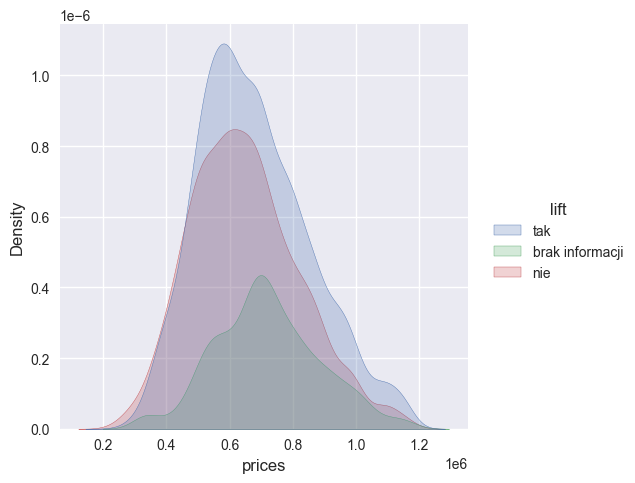

In [18]:
sns.displot(df, x="prices", hue="lift",  kind="kde", fill=True)

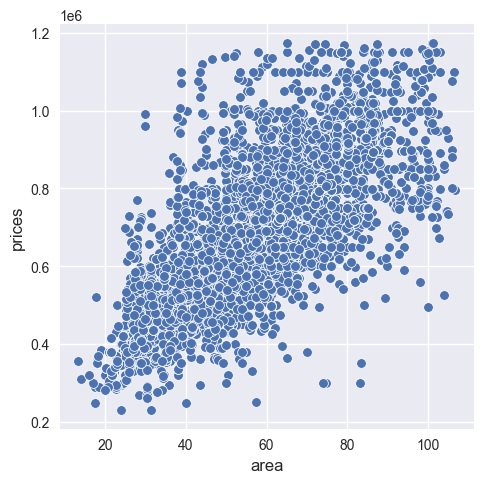

In [19]:
sns.relplot(
    data=df,
    x="area", y="prices",
)

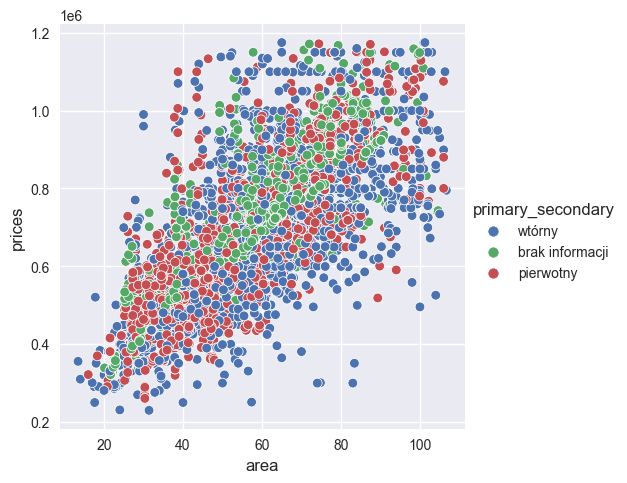

In [20]:
sns.relplot(
    data=df,
    x="area", y="prices", hue="primary_secondary",
)

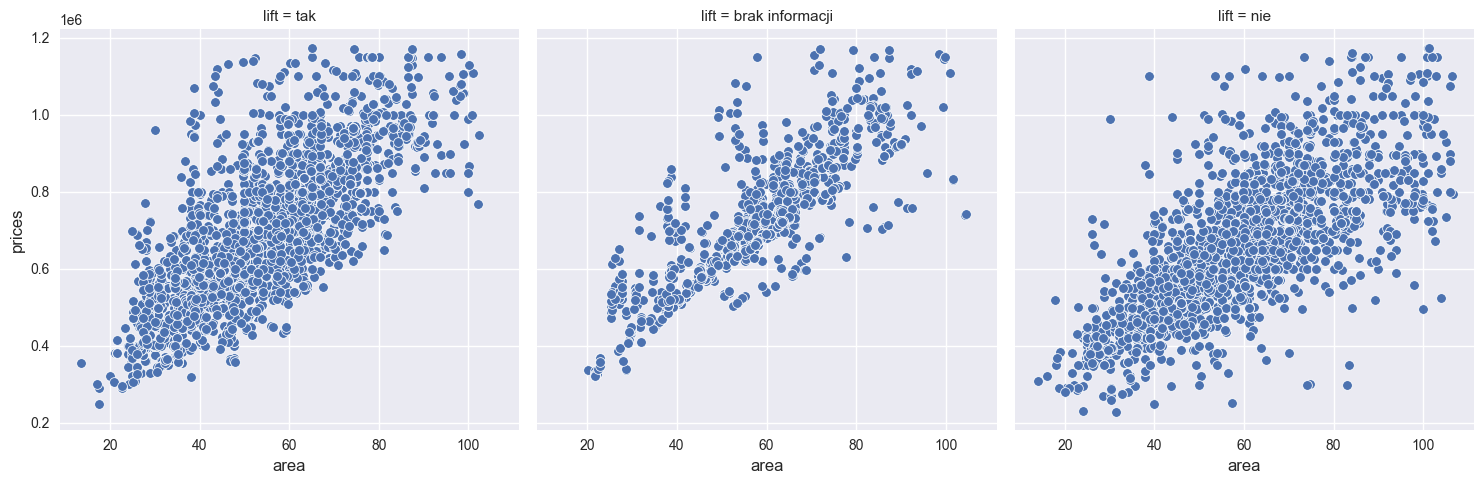

In [21]:
sns.relplot(
    data=df,
    x="area", y="prices",
    #hue="primary_secondary",
    #style = "primary_secondary",
    col="lift",
    
)

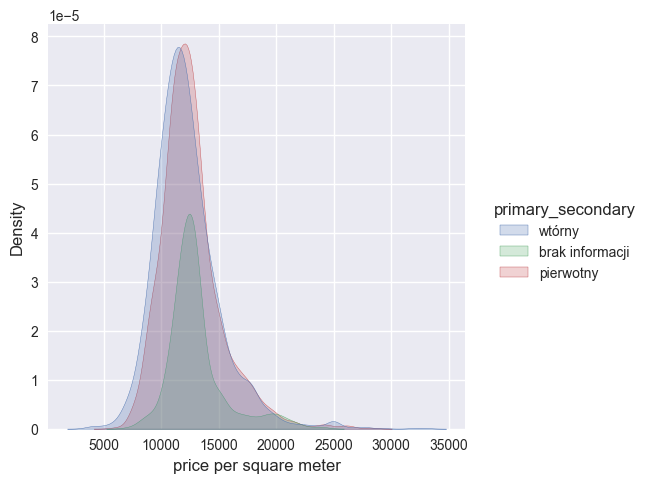

In [22]:
sns.displot(df, x="price per square meter", hue="primary_secondary",  kind="kde", fill=True)

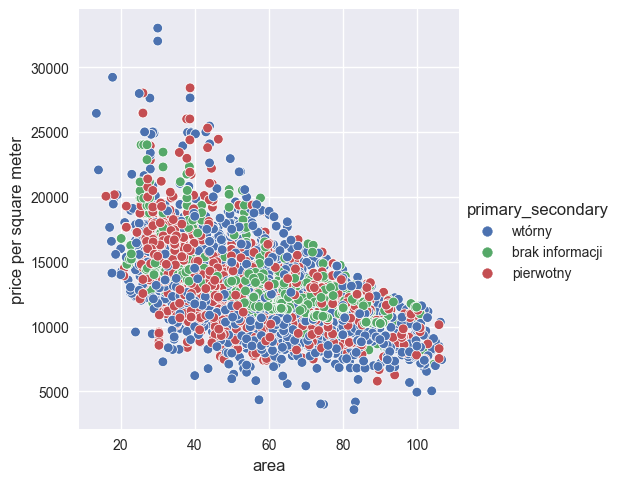

In [23]:
sns.relplot(
    data=df,
    x="area", y="price per square meter",hue="primary_secondary",
)

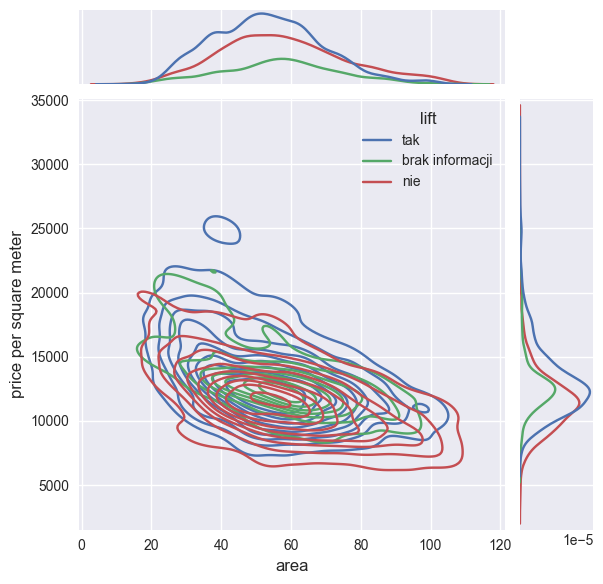

In [24]:
sns.jointplot(
    data=df,
    x="area", y="price per square meter", hue="lift",
    kind="kde"
)

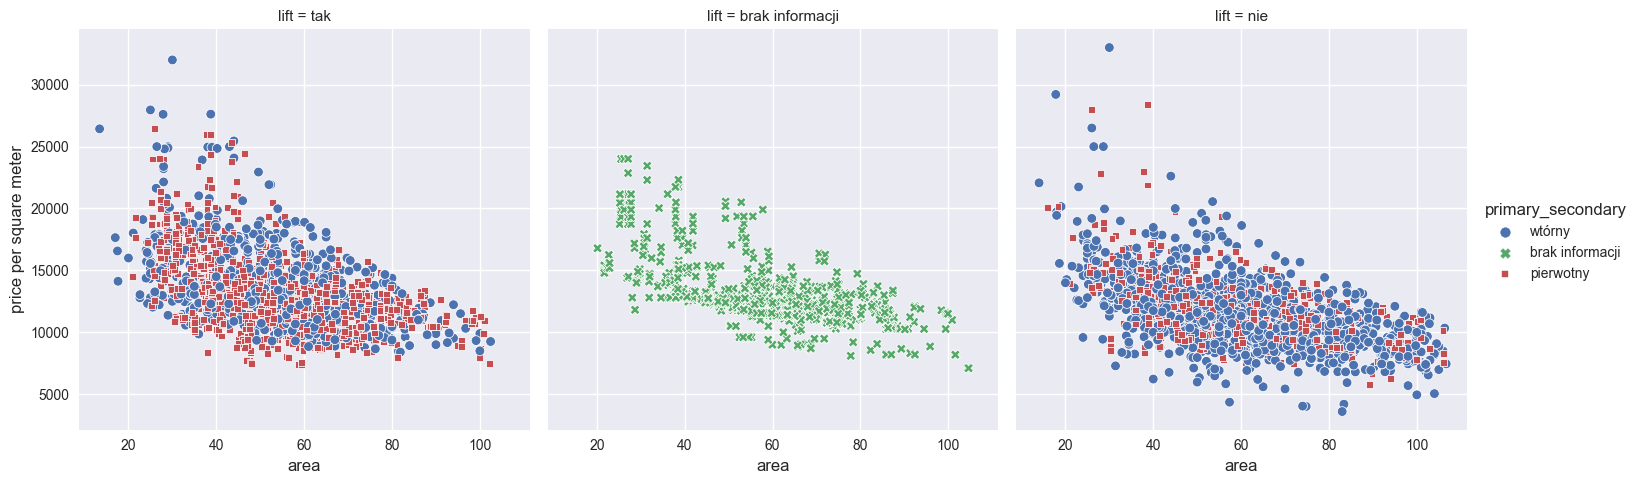

In [25]:
sns.relplot(
    data=df,
    x="area", y="price per square meter",
    hue="primary_secondary",
    style = "primary_secondary",
    col="lift",
    
)

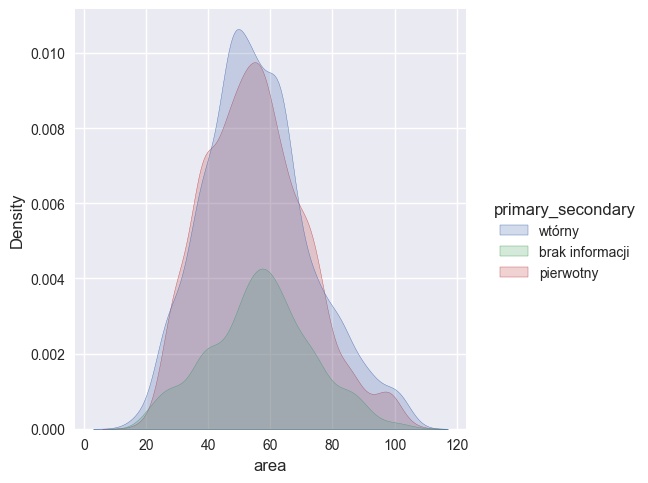

In [26]:
sns.displot(df, x="area", hue="primary_secondary",  kind="kde", fill=True)

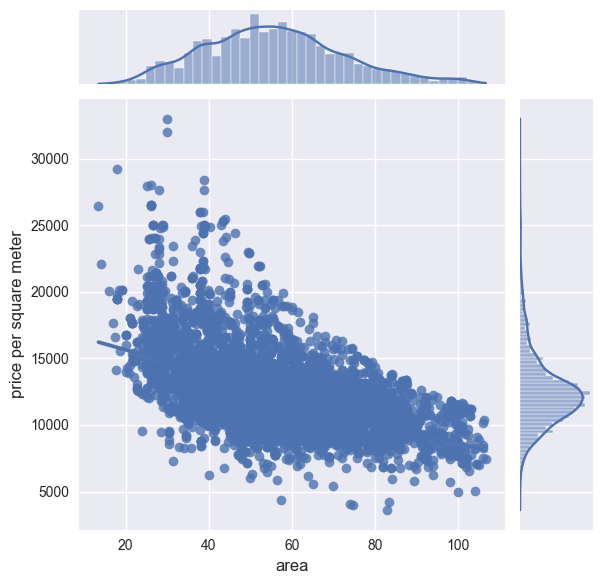

In [27]:
sns.jointplot(x="area", y="price per square meter", data=df, kind="reg");

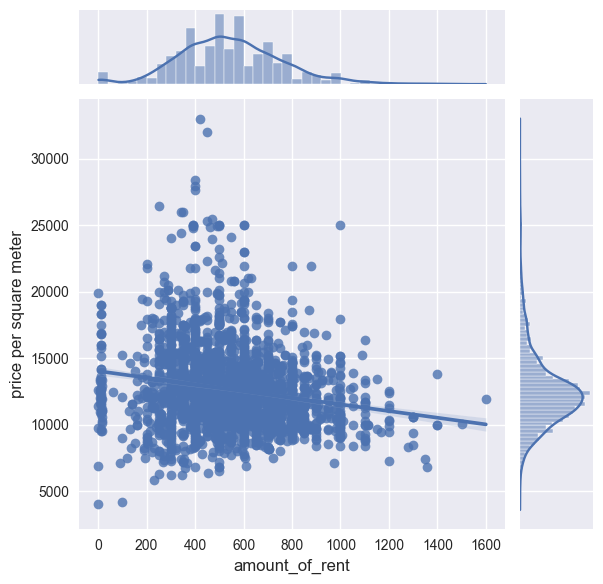

In [28]:
sns.jointplot(x="amount_of_rent", y="price per square meter", data=df, kind="reg");

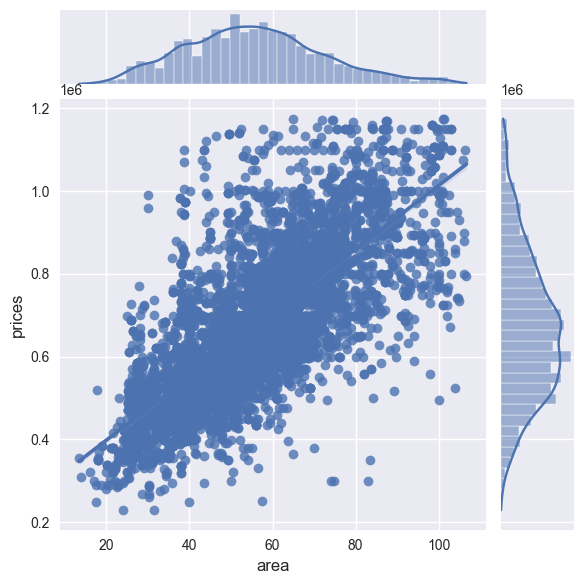

In [29]:
sns.jointplot(x="area", y="prices", data=df, kind="reg");

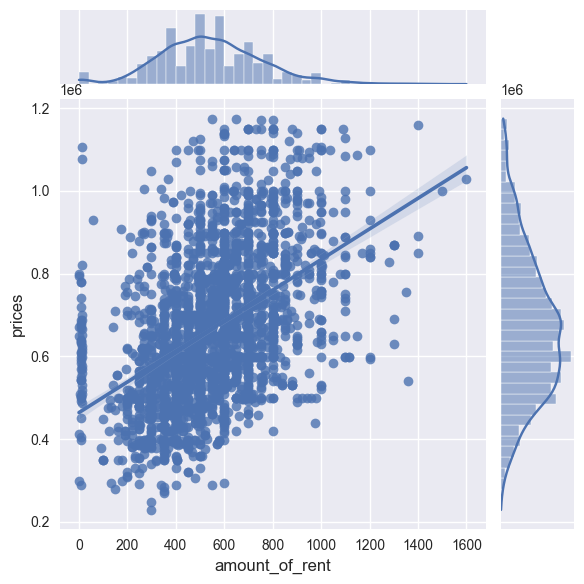

In [30]:
sns.jointplot(x="amount_of_rent", y="prices", data=df, kind="reg");

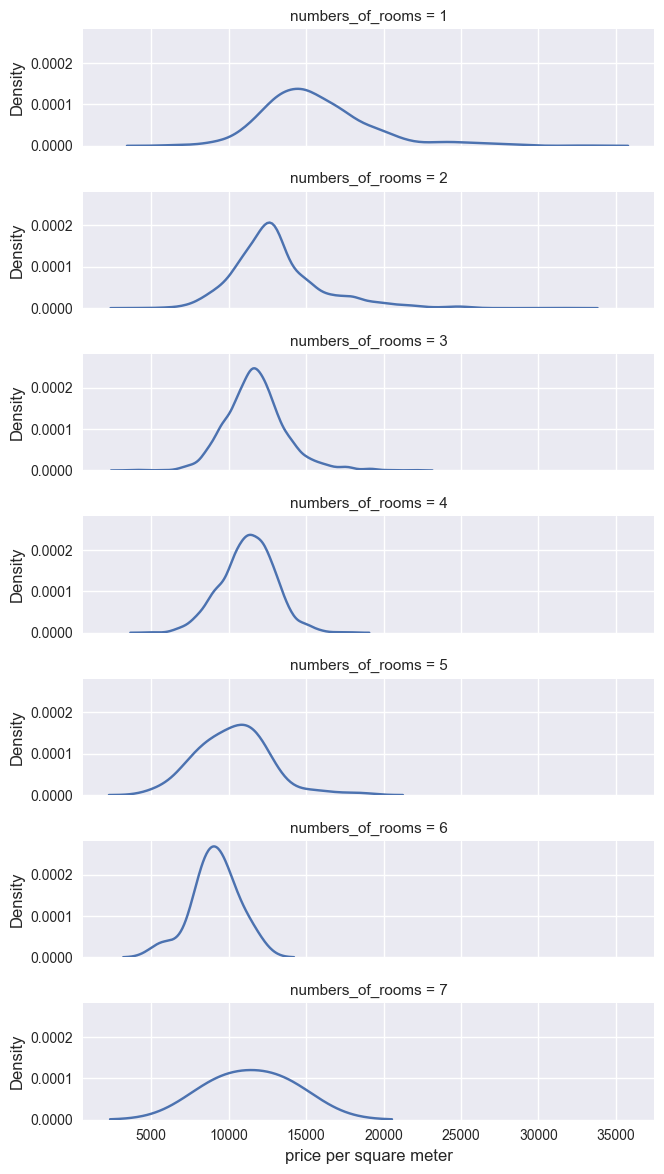

In [31]:
g = sns.FacetGrid(df, row="numbers_of_rooms", 
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "price per square meter")

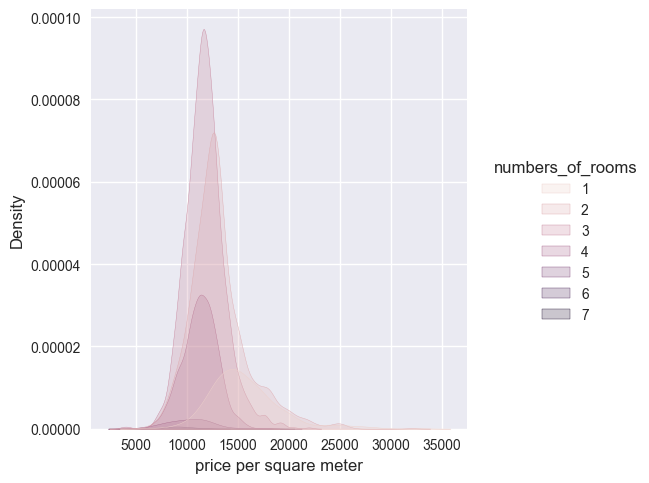

In [32]:
sns.displot(df, x="price per square meter", hue="numbers_of_rooms",  kind="kde", fill=True)

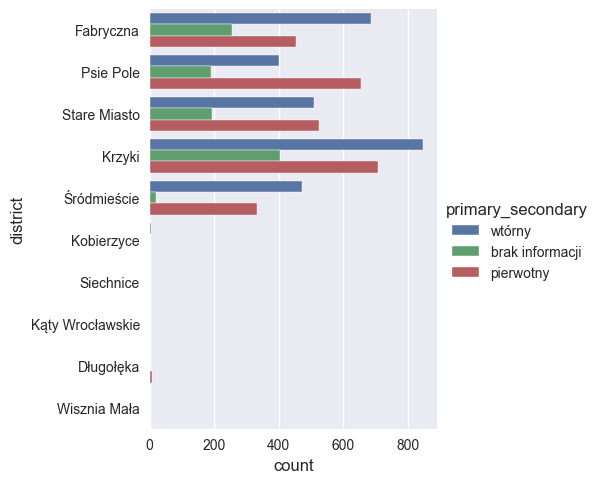

In [33]:
sns.catplot(data=df, y="district",  hue="primary_secondary", kind="count")

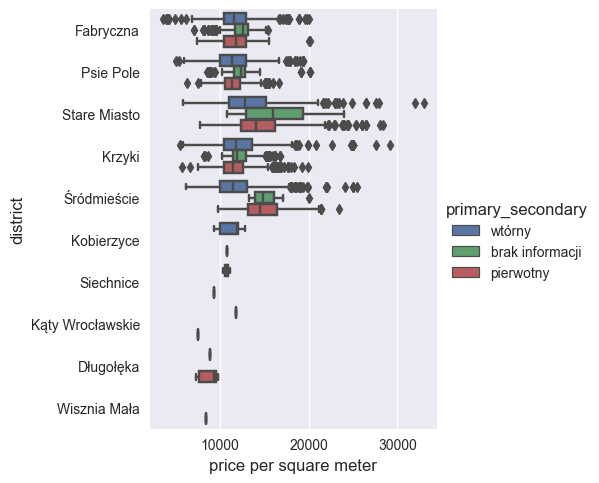

In [34]:
sns.catplot(data=df,x="price per square meter", y="district",  hue="primary_secondary", kind="box")

In [35]:
df_gr_by_districts = df.groupby(["district"]).agg(
                          Number_of_offers = ("titles", "count"),
                          Price_min = ("prices", "min"),
                          Price_median = ("prices", "median"),
                          Price_mean = ("prices", "mean"),
                          Price_max = ("prices", "max"),
                          Area_min = ("area", "min"),
                          Area_median = ("area", "median"),
                          Area_mean = ("area", "mean"),
                          Area_max = ("area", "max"),
                          Price_psm_mean = ("price per square meter", "mean"),
                          Price_psm_median = ("price per square meter", "median"),
                        ).round(2)
df_gr_by_districts = df_gr_by_districts.sort_values("Number_of_offers", ascending = False)
df_gr_by_districts

Number_of_offers  Price_min  Price_median  Price_mean  \
district                                                                  
Krzyki                        1960   259710.0      657231.5   666176.21   
Fabryczna                     1393   228900.0      649000.0   650241.44   
Psie Pole                     1246   249000.0      630000.0   635083.80   
Stare Miasto                  1224   230000.0      699995.0   717510.10   
Śródmieście                    822   309000.0      699000.0   718891.65   
Długołęka                        8   565000.0      631300.0   632025.00   
Kobierzyce                       7   530000.0      699000.0   800857.14   
Siechnice                        3   284400.0      840000.0   674466.67   
Kąty Wrocławskie                 2   460000.0      554500.0   554500.00   
Wisznia Mała                     1   669000.0      669000.0   669000.00   

                  Price_max  Area_min  Area_median  Area_mean  Area_max  \
district                                                                  
Krzyki            1152924.0     17.80        56.52      56.93    106.68   
Fabryczna         1151528.0     16.01        55.10      56.53    104.61   
Psie Pole         1134097.0     17.50        54.74      55.75    106.34   
Stare Miasto      1175000.0     13.43        50.46      52.29    102.86   
Śródmieście       1171800.0     14.00        55.00      56.27    106.00   
Długołęka          698000.0     60.00        68.00      73.81     92.50   
Kobierzyce        1086000.0     48.00        58.00      73.36    101.76   
Siechnice          899000.0     30.34        80.22      63.85     81.00   
Kąty Wrocławskie   649000.0     54.74        57.87      57.87     61.00   
Wisznia Mała       669000.0     79.00        79.00      79.00     79.00   

                  Price_psm_mean  Price_psm_median  
district                                            
Krzyki                  12071.61           11811.5  
Fabryczna               11795.77           11935.0  
Psie Pole               11638.77           11535.5  
Stare Miasto            14459.78           13668.0  
Śródmieście             13309.55           13000.0  
Długołęka                8750.50            9182.0  
Kobierzyce              11140.43           10855.0  
Siechnice               10317.00           10370.0  
Kąty Wrocławskie         9698.50            9698.5  
Wisznia Mała             8468.00            8468.0

<Axes: xlabel='district'>

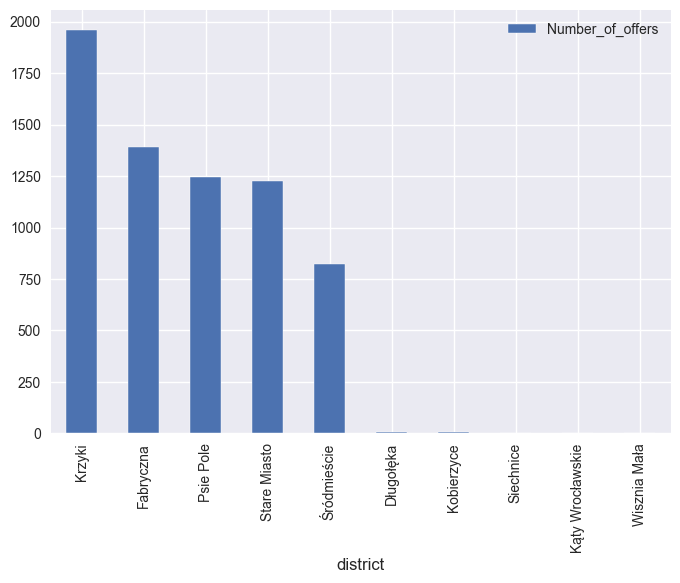

In [36]:
df_gr_by_districts = df_gr_by_districts.sort_values("Number_of_offers", ascending = False)
df_gr_by_districts[["Number_of_offers"]].plot(kind='bar')

# Skoro jest tak mało ofert z kilku dzielnic może je dać jako dzielnica inna 

<Axes: xlabel='district'>

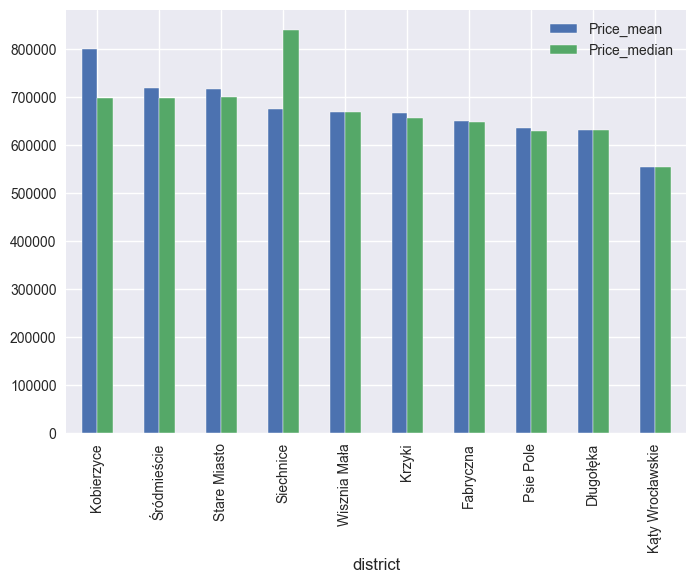

In [37]:
df_gr_by_districts = df_gr_by_districts.sort_values("Price_mean", ascending = False)
df_gr_by_districts[["Price_mean","Price_median"]].plot(kind='bar')

<Axes: xlabel='district'>

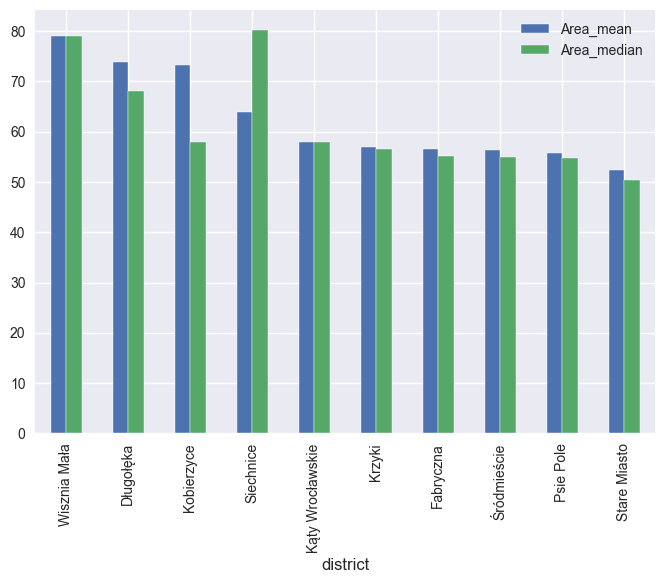

In [38]:
df_gr_by_districts = df_gr_by_districts.sort_values("Area_mean", ascending = False)
df_gr_by_districts[["Area_mean","Area_median"]].plot(kind='bar')

<Axes: xlabel='district'>

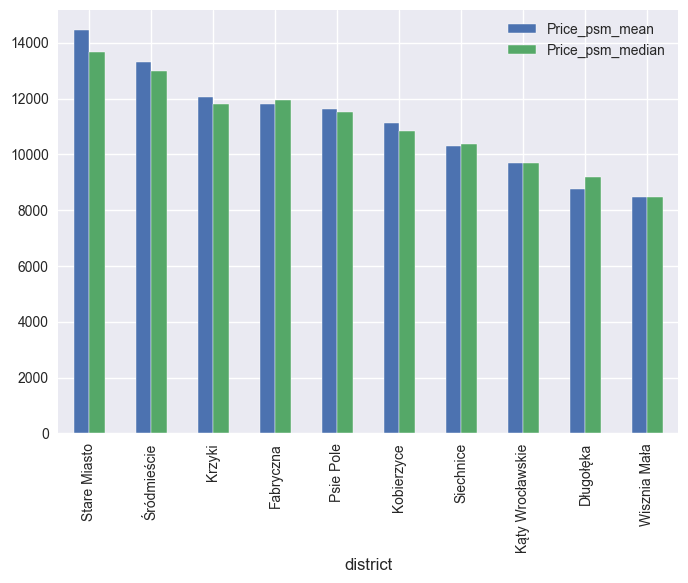

In [39]:
df_gr_by_districts = df_gr_by_districts.sort_values("Price_psm_mean", ascending = False)
df_gr_by_districts[["Price_psm_mean","Price_psm_median"]].plot(kind='bar')

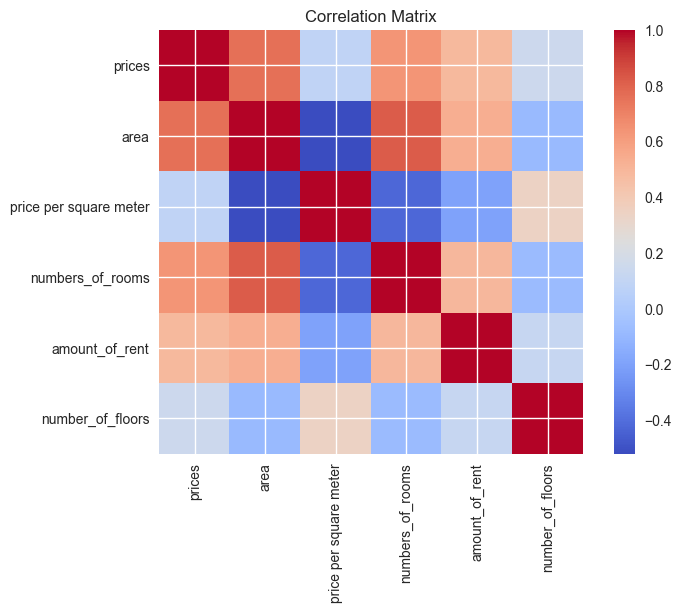

In [40]:
correlation_matrix1 = df[numerical_cols[:6]].corr(method="spearman", numeric_only=True)
plt.imshow(correlation_matrix1, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix1.columns)), correlation_matrix1.columns, rotation=90)
plt.yticks(range(len(correlation_matrix1.columns)), correlation_matrix1.columns)
plt.title('Correlation Matrix')
plt.show()

In [41]:
corr = df[numerical_cols[:6]].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\48504\AppData\Local\Temp\ipykernel_16348\1356858525.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [42]:
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

<Axes: >

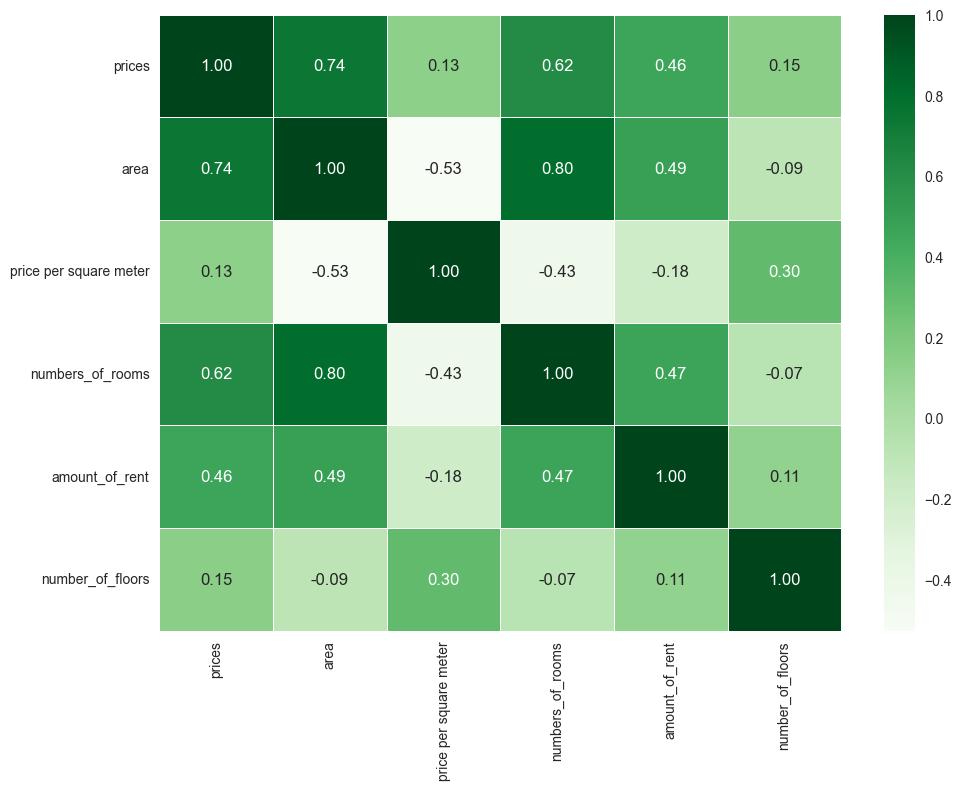

In [43]:
corr = df[numerical_cols[:6]].corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

# Zapisuje dane ponownie do pliku ze względu na usuniecie wartości odstającej w "amount of rent"

In [44]:
URL = "oto_dom_wroclaw_30_10_2023_cleaned_up"

In [45]:
df.to_csv(URL, index=False, sep=",", encoding="utf-8")